# How well do jobs and skills pay for Data Analysts?

## Methology

1_Evaluate median salary for data jobs

2_Find median salary per skill for Data Analysts

3-Visualize for highest paying skills and most demanded skills

## Import Libraries and Data

In [104]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter our data to only include salary values from USA ,and  Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [105]:
job_titles =['Data Scientist','Data Analyst','Data Engineer','Senior Data Scientist','Senior Data Engineer','Senior Data Analyst']

# filter for the job titles and country
df_Ger = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# filter the df for the job titles
df_D = df_Ger[df_Ger['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_D.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

df_D.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).to_frame()

,salary_year_avg
job_title_short,
Senior Data Scientist,155000.0
Senior Data Engineer,150000.0
Data Scientist,130000.0
Data Engineer,125000.0
Senior Data Analyst,110000.0
Data Analyst,90000.0


## Plot Salary Distributions

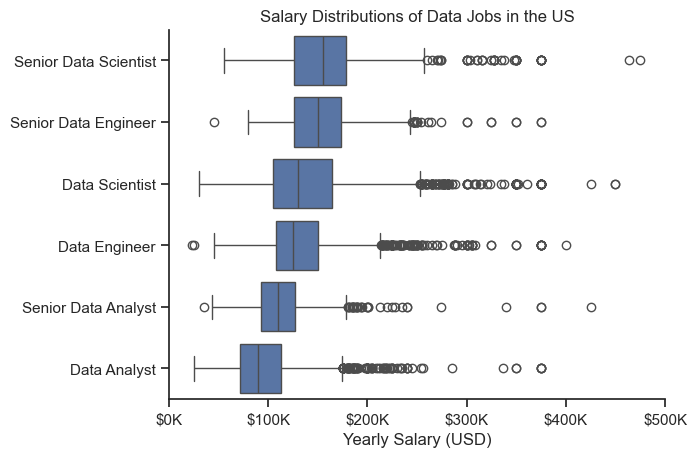

In [106]:
sns.boxplot(data=df_D, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 500000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

In [107]:
# Only get data analyst jobs in the USA
df_DA_Ger = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_Ger = df_DA_Ger.dropna(subset=['salary_year_avg'])

df_DA_Ger = df_DA_Ger.explode('job_skills')

df_DA_Ger[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


## Determine The Highest Paid Skills and Most Demanded Skills

In [108]:
# The highest paid skills
df_DA_top_pay = df_DA_Ger.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(7)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0


In [109]:
# the most demanded skills
df_DA_skills = df_DA_Ger.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(7)

df_DA_skills = df_DA_skills.sort_values(by='median', ascending=False)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.0
tableau,1364,92875.0
r,893,92500.0
sql,2508,91000.0
sas,926,90000.0
power bi,838,90000.0
excel,1808,84392.0


## Creates two horizontal bar charts:

* Displays the highest paid skills
* Shows the most in demand skills

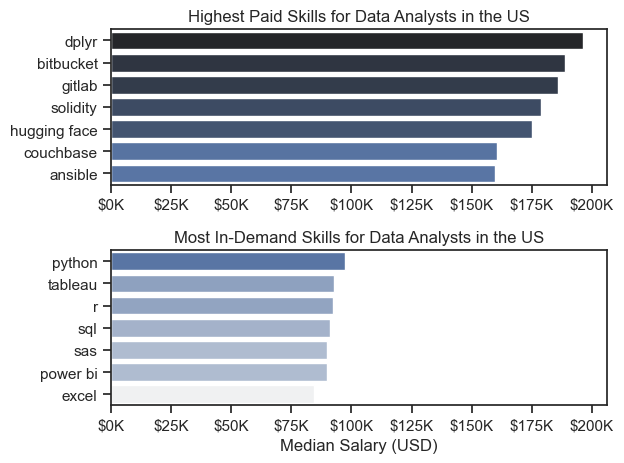

In [110]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()

ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()